In [1]:
"""
Format data functions:
https://www.kaggle.com/gimunu/data-augmentation-with-keras-into-cnn

Keras CNN Architecture:
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
"""

import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from subprocess import check_output

### fastai downloads

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = "../input/"
sz=64 #224

### First look at Whale Pictures

In [6]:
os.listdir(PATH)

['test', 'train-out', 'models', 'train.csv', 'train', 'tmp']

['4a880271.jpg', 'a1f3adf5.jpg', 'aa0f8bf4.jpg', '416ccbf3.jpg', '3b52038b.jpg']


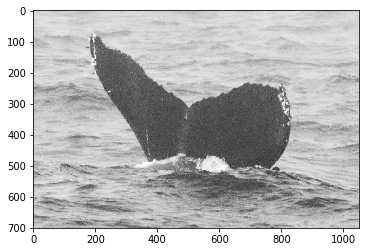

In [7]:
# Train Images

files = os.listdir(f'{PATH}/train/')[:5]
print(files)

img = plt.imread(f'{PATH}/train/{files[0]}')
plt.imshow(img)

['d7531cbd.jpg', '00f8a2e9.jpg', '1f0423a1.jpg', '03c6c2eb.jpg', '7c2fd440.jpg']


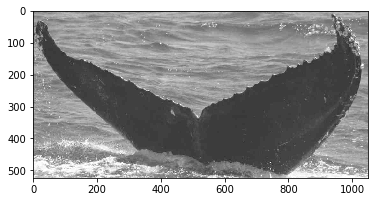

In [8]:
# Test Images

test_files = os.listdir(f'{PATH}/test/')[:5]
print(test_files)

test_img = plt.imread(f'{PATH}/test/{test_files[0]}')
plt.imshow(test_img)

In [9]:
img.shape

(701, 1050, 3)

In [10]:
img[:4, :4]

array([[[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]]], dtype=uint8)

In [11]:
type(img)

numpy.ndarray

### Quickstart Fast.ai Model

Give the Model path(s) to the images, not numpy arrays, to start

### Inspect images and put in `fastai` style paths

In [12]:
train_images = glob("../input/train/*jpg")
test_images = glob("../input/test/*jpg")
df = pd.read_csv("../input/train.csv")

# df["Image"] = df["Image"].map( lambda x : "../input/train/"+x)
# ImageToLabelDict = dict(zip( df["Image"], df["Id"]))

In [13]:
print('df:', df.shape)

df: (9850, 2)


In [14]:
!ls ../input/train/ | head -5

00022e1a.jpg
000466c4.jpg
00087b01.jpg
001296d5.jpg
0014cfdf.jpg
ls: write error: Broken pipe


In [15]:
df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


### Put Whale images in the Fastai paths

In [16]:
df['Image'].values

array(['00022e1a.jpg', '000466c4.jpg', '00087b01.jpg', ..., 'ffecec63.jpg', 'fff04277.jpg', 'fffd4260.jpg'],
      dtype=object)

In [17]:
df2 = df.copy()
df2.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [18]:
df2.index = df['Image']
df2.head()

,Image,Id
Image,,
00022e1a.jpg,00022e1a.jpg,w_e15442c
000466c4.jpg,000466c4.jpg,w_1287fbc
00087b01.jpg,00087b01.jpg,w_da2efe0
001296d5.jpg,001296d5.jpg,w_19e5482
0014cfdf.jpg,0014cfdf.jpg,w_f22f3e3


In [19]:
df2 = df2.drop(columns=['Image'])
df2.head()

,Id
Image,
00022e1a.jpg,w_e15442c
000466c4.jpg,w_1287fbc
00087b01.jpg,w_da2efe0
001296d5.jpg,w_19e5482
0014cfdf.jpg,w_f22f3e3


In [20]:
whale_dict = df2.to_dict()['Id']
whale_dict

{'00022e1a.jpg': 'w_e15442c',
 '000466c4.jpg': 'w_1287fbc',
 '00087b01.jpg': 'w_da2efe0',
 '001296d5.jpg': 'w_19e5482',
 '0014cfdf.jpg': 'w_f22f3e3',
 '0025e8c2.jpg': 'w_8b1ca89',
 '0026a8ab.jpg': 'w_eaad6a8',
 '0031c258.jpg': 'new_whale',
 '0035632e.jpg': 'w_3d0bc7a',
 '0037e7d3.jpg': 'w_50db782',
 '00389cd7.jpg': 'w_2863d51',
 '0042dcc4.jpg': 'w_6dc7db6',
 '0042ea34.jpg': 'w_968f2ca',
 '00467ae9.jpg': 'w_fd1cb9d',
 '004a97f3.jpg': 'w_60759c2',
 '004c5fb9.jpg': 'w_ab6bb0a',
 '005c57e7.jpg': 'w_79b42cd',
 '006d0aaf.jpg': 'w_c9ba30c',
 '0078af23.jpg': 'w_e6ec8ee',
 '007c3603.jpg': 'new_whale',
 '00863b8c.jpg': 'new_whale',
 '008809b5.jpg': 'w_7e5cc5e',
 '008baccf.jpg': 'w_ab6db0f',
 '0091c92b.jpg': 'w_bc8d634',
 '009dca38.jpg': 'w_b59c523',
 '00a29f63.jpg': 'w_2850471',
 '00aa021c.jpg': 'new_whale',
 '00ab018e.jpg': 'w_51969d2',
 '00ac0e86.jpg': 'w_4be8a3e',
 '00acb5a9.jpg': 'w_c0cfd5b',
 '00ad9219.jpg': 'new_whale',
 '00af84d8.jpg': 'w_339c8ae',
 '00b2c0cd.jpg': 'w_7c7a78c',
 '00b588d6

In [21]:
train_whale = '00022e1a.jpg'
whale_dict[train_whale]

'w_e15442c'

In [22]:
df[df['Id'] == whale_dict[train_whale]]

,Image,Id
0,00022e1a.jpg,w_e15442c


In [23]:
for idx, (image, label) in enumerate(whale_dict.items()):
    if idx > 5:
        break
        
    print(image, label)

00022e1a.jpg w_e15442c
000466c4.jpg w_1287fbc
00087b01.jpg w_da2efe0
001296d5.jpg w_19e5482
0014cfdf.jpg w_f22f3e3
0025e8c2.jpg w_8b1ca89


### main file create for `fastai` format

In [24]:
# Main create

import os
import shutil

def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

out_dir = '../input/train-out'
create_directory(out_dir)

for idx, (image, label) in enumerate(whale_dict.items()):
    # was used for testing spike of coping images over
    #     if idx > 5:
    #         break
        
    # dir
    label_dir = os.path.join(out_dir, label)
    create_directory(label_dir)
    # file
    shutil.copyfile(f'../input/train/{image}', os.path.join(label_dir, f'{label}.{image}'))

### (cont.) Tueday 6/12

In [25]:
PATH = '../input/'
arch=resnet34
data = ImageClassifierData.from_paths(
    PATH, tfms=tfms_from_model(arch, sz), trn_name='train-out', val_name='train-out')
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      8.518419   7.622618   0.081624  
    1      7.900616   7.168733   0.091472                   



[array([7.16873]), 0.09147208121827412]

In [26]:
data.val_y

array([   0,    0,    0, ..., 4249, 4249, 4250])

In [27]:
data.classes

['new_whale',
 'w_0013924',
 'w_001ebbc',
 'w_002222a',
 'w_002b682',
 'w_002dc11',
 'w_0087fdd',
 'w_008c602',
 'w_009dc00',
 'w_00b621b',
 'w_00c4901',
 'w_00cb685',
 'w_00d8453',
 'w_00fbb4e',
 'w_0103030',
 'w_010a1fa',
 'w_011d4b5',
 'w_0122d85',
 'w_01319fa',
 'w_0134192',
 'w_013bbcf',
 'w_014250a',
 'w_014a645',
 'w_0156f27',
 'w_015c991',
 'w_015e3cf',
 'w_01687a8',
 'w_0175a35',
 'w_018bc64',
 'w_01a4234',
 'w_01a51a6',
 'w_01a99a5',
 'w_01ab6dc',
 'w_01b2250',
 'w_01c2cb0',
 'w_01cbcbf',
 'w_01d6ca0',
 'w_01e1223',
 'w_01f211f',
 'w_01f8a43',
 'w_01f9086',
 'w_024358d',
 'w_0245a27',
 'w_0265cb6',
 'w_026fdf8',
 'w_028ca0d',
 'w_029013f',
 'w_02a768d',
 'w_02b775b',
 'w_02bb4cf',
 'w_02c2248',
 'w_02c9470',
 'w_02cf46c',
 'w_02d5fad',
 'w_02d7dc8',
 'w_02e5407',
 'w_02facde',
 'w_02fce90',
 'w_030294d',
 'w_0308405',
 'w_0324b97',
 'w_032d44d',
 'w_0337aa5',
 'w_034a3fd',
 'w_0378699',
 'w_037955e',
 'w_03a2ed7',
 'w_03b5e9a',
 'w_03c6d18',
 'w_03c84ef',
 'w_03dc41c',
 'w_03

In [28]:
len(data.classes)

4251

In [29]:
# M x N where M training examples with N classes
log_preds = learn.predict()
log_preds.shape

(9850, 4251)

In [30]:
log_preds[0].shape

(4251,)

In [31]:
log_preds[0].sum()

-36577.68

In [32]:
log_preds[0]

array([-3.02978, -9.49926, -8.72004, ..., -9.74931, -9.17293, -8.33098], dtype=float32)

In [33]:
np.exp(log_preds[0]).sum()

1.0

In [34]:
preds = np.argmax(log_preds, axis=1)

# example says use "1" for the dog label
# let's use the "0" index, or "new_whale" for this dataset
probs = np.exp(log_preds[:,1])

### look at what predictions the model got correct or incorrect

In [35]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [36]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [37]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [38]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


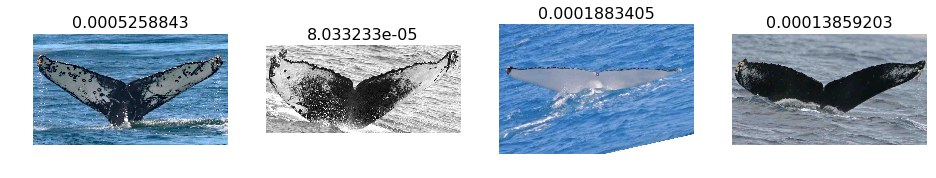

In [39]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


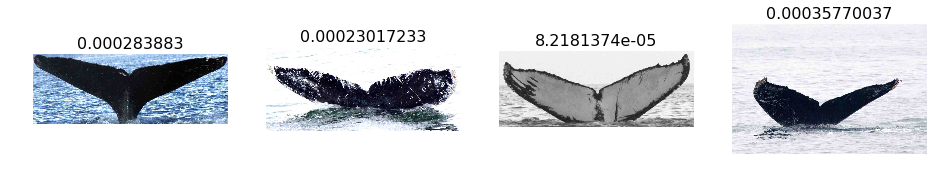

In [40]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [41]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct "new_whale"


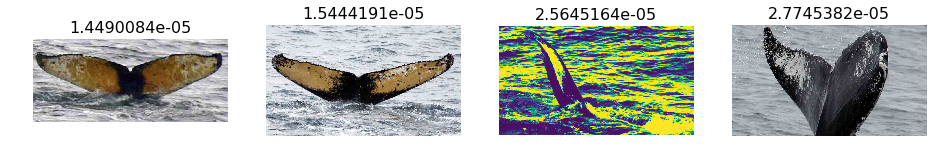

In [42]:
class_index = 0
plot_val_with_title(most_by_correct(class_index, True), f"Most correct \"{data.classes[class_index]}\"")

Most incorrect "new_whale"


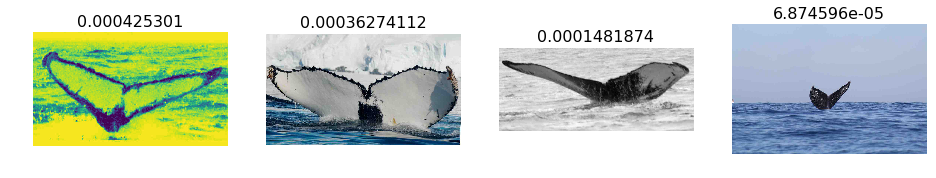

In [43]:
class_index = 0
plot_val_with_title(most_by_correct(class_index, False), f"Most incorrect \"{data.classes[class_index]}\"")

Most uncertain predictions


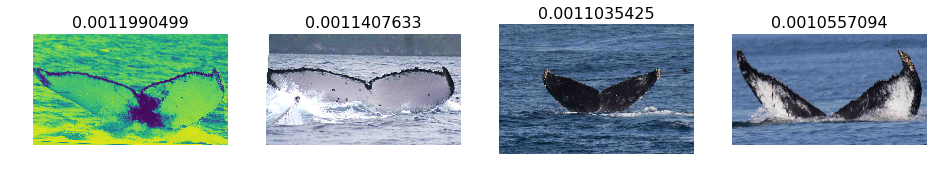

In [44]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

### find the LR

In [45]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [46]:
lrf=learn.lr_find()

 91%|█████████ | 140/154 [00:02<00:00, 65.59it/s, loss=146] 


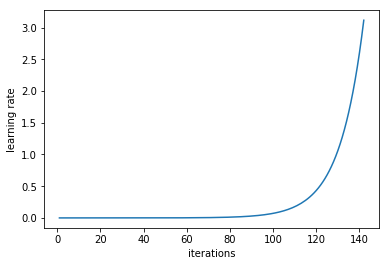

In [47]:
learn.sched.plot_lr()

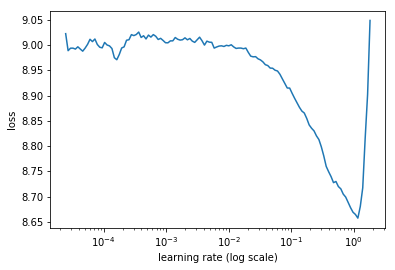

In [48]:
learn.sched.plot()

### Data augmentation

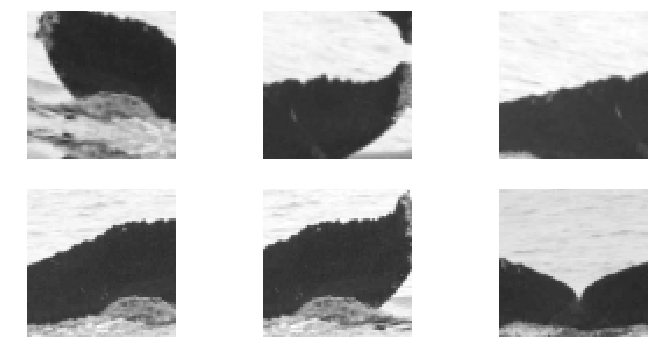

In [49]:
train_path_kwargs = dict(trn_name='train-out', val_name='train-out')

tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1)

def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1, **train_path_kwargs)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

ims = np.stack([get_augs() for i in range(6)])

plots(ims, rows=2)

In [50]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, **train_path_kwargs)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [51]:
learn.fit(0.5, 5)

epoch      trn_loss   val_loss   accuracy                   
    0      8.24834    7.454043   0.043046  
    1      8.050428   6.507221   0.064975                   
    2      7.905867   5.813181   0.100102                   
    3      7.910806   4.905604   0.198274                   
    4      7.905212   4.703767   0.191574                   



[array([4.70377]), 0.19157360408058022]

In [52]:
learn.fit(0.5, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      5.516275   2.637046   0.545787  
    1      4.888669   2.081861   0.621523                   
    2      4.633204   1.756924   0.682132                   
    3      4.389036   1.534149   0.724264                   
    4      4.130895   1.352782   0.747005                   



[array([1.35278]), 0.7470050762026443]

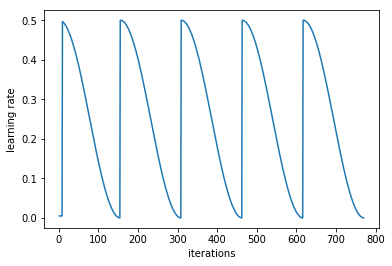

In [53]:
learn.sched.plot_lr()

In [54]:
last_layer_filename = '64_lastlayer'

learn.save(last_layer_filename)

In [55]:
learn.load(last_layer_filename)

### (cont.) 6/13 - output initial predictions

In [56]:
probs

array([0.00007, 0.00031, 0.00013, ..., 0.00013, 0.00028, 0.00021], dtype=float32)

In [57]:
probs.shape

(9850,)

In [58]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

# TODO: need to debug, calculated accuracy on my own below, but throwing a PyTorch Error
# accuracy(probs, y.shape[0])

In [59]:
y

array([   0,    0,    0, ..., 4249, 4249, 4250])

In [60]:
y.shape

(9850,)

In [61]:
probs

array([[0.657  , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.04007, 0.     , 0.00002, ..., 0.00006, 0.     , 0.     ],
       [0.01005, 0.     , 0.00004, ..., 0.     , 0.     , 0.00009],
       ...,
       [0.01343, 0.     , 0.00005, ..., 0.     , 0.45818, 0.     ],
       [0.18375, 0.     , 0.     , ..., 0.     , 0.7416 , 0.     ],
       [0.01212, 0.00006, 0.     , ..., 0.00002, 0.     , 0.52001]], dtype=float32)

In [62]:
probs.shape

(9850, 4251)

In [63]:
preds = np.argmax(probs, axis=1)
preds

array([   0, 1346, 2799, ..., 4249, 4249, 4250])

In [64]:
preds.shape

(9850,)

In [65]:
correct_preds_count = np.sum(preds == y)
correct_preds_count

7367

In [66]:
accuracy = correct_preds_count / y.shape[0]
accuracy

0.7479187817258883

### output to file

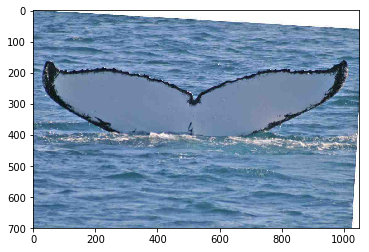

In [67]:
test_file = '../input/test/00029b3a.jpg'
img = plt.imread(test_file)
plt.imshow(img)

In [68]:
PATH

'../input/'

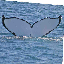

In [69]:
fn = 'test/00029b3a.jpg'
Image.open(PATH+fn).resize((sz, sz))

In [106]:
def ImportImage(filename):
    # img = Image.open(filename).convert("LA").resize((SIZE,SIZE))
    img = Image.open(filename).resize((sz, sz))
    return np.array(img) #[:,:,0] # don't flattent to a !D matrix

trn_tfms, val_tfrms = tfms_from_model(arch, sz)
im = val_tfrms(ImportImage(f'{PATH}{fn}'))

log_probs = to_np(learn.models.model(V(T(im[None]).cuda())))
preds = np.argmax(log_probs, axis=1)

print(preds)

[0]


In [107]:
preds[0]

0

In [108]:
np.argmax(log_probs, axis=1)

array([0])

In [110]:
# find the nth index func

def nth_item_index(k, nth_index):
    nth_value = np.partition(k.flatten(), -1)[-nth_index]
    idx_arr = np.where(k==nth_value)
    return idx_arr[0][0]

nth_item_index(log_probs, 1)

0

In [114]:
flat = log_probs.flatten()
flat

array([ -0.96714, -11.42842,  -9.10839, ..., -13.06085,  -6.92966,  -9.40945], dtype=float32)

In [116]:
flat.sort()
flat

array([-17.42622, -17.40332, -17.37292, ...,  -4.08974,  -3.57855,  -0.96714], dtype=float32)

In [119]:
flat[-5:]

array([-4.85593, -4.34474, -4.08974, -3.57855, -0.96714], dtype=float32)

In [130]:
def nth_item_index(k, nth_index):
    nth_value = np.partition(k.flatten(), -nth_index)[-nth_index]
    idx_arr = np.where(k.flatten()==nth_value)
    return idx_arr[0][0]

nth_item_index(log_probs, 2)

1287

In [132]:
for i in range(1, 6):
    idx = nth_item_index(log_probs, i)
    print(idx, '\t', data.classes[idx])

0 	 new_whale
1287 	 w_4da05cc
1995 	 w_77ee0be
3981 	 w_f0a4a2a
2351 	 w_8c1ec28


### main - write predictions

In [133]:
test_images = glob("../input/test/*jpg")

In [135]:
def ImportImage(filename):
    # img = Image.open(filename).convert("LA").resize((SIZE,SIZE))
    img = Image.open(filename).resize((sz, sz))
    return np.array(img) #[:,:,0] # don't flattent to a !D matrix

In [136]:
test_images[0]

'../input/test/d7531cbd.jpg'

In [137]:
def get_log_probs(img_filepath):
    trn_tfms, val_tfrms = tfms_from_model(arch, sz)
    im = val_tfrms(ImportImage(f'{PATH}{fn}'))
    return to_np(learn.models.model(V(T(im[None]).cuda())))

log_probs = get_log_probs(test_images[0])
log_probs

array([[ -0.96714, -11.42842,  -9.10839, ..., -13.06085,  -6.92966,  -9.40945]], dtype=float32)

In [138]:
def nth_item_index(k, nth_index):
    nth_value = np.partition(k.flatten(), -nth_index)[-nth_index]
    idx_arr = np.where(k.flatten()==nth_value)
    return idx_arr[0][0]

for i in range(1, 6):
    idx = nth_item_index(log_probs, i)
    print(idx, '\t', data.classes[idx])

0 	 new_whale
1287 	 w_4da05cc
1995 	 w_77ee0be
3981 	 w_f0a4a2a
2351 	 w_8c1ec28


In [ ]:
import os

with open(os.path.join('../input', 'submission.csv'), 'w') as f:
    # header
    f.write('Image,Id\n')
    
    # data
    for idx, img_filepath in enumerate(test_images):
        log_probs = get_log_probs(img_filepath)
        filename = img_filepath.split('/')[-1]
        preds = [data.classes[nth_item_index(log_probs, i)] for i in range(1,6)]
        f.write('{},{}\n'.format(filename, " ".join(preds)))
        if idx % 100 == 0:
            print(idx)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [146]:
len(test_images)

15610

In [125]:
np.partition(log_probs.flatten(), -1)

array([ -9.40945, -11.42842,  -9.10839, ..., -13.06085,  -6.92966,  -0.96714], dtype=float32)

In [73]:
log_probs.shape

(1, 4251)

In [77]:
log_probs.flatten().shape

(4251,)

In [90]:
np.partition(log_probs.flatten(), -1)[-1]

-0.96714497

In [91]:
log_probs.max()

-0.96714497

In [92]:
np.where(log_probs.flatten() == log_probs.max())

(array([0]),)

In [97]:
max2 = np.partition(log_probs.flatten(), -1)[-2]
max2

-6.9296575

In [104]:
np.where(log_probs.flatten() == max2)

(array([4249]),)

In [109]:
log_probs.flatten()

array([ -0.96714, -11.42842,  -9.10839, ..., -13.06085,  -6.92966,  -9.40945], dtype=float32)

In [102]:
def nth_item_index(k, nth_index):
    nth_value = np.partition(k.flatten(), -1)[-nth_index]
    idx_arr = np.where(k.flatten()==nth_value)
    print(f'nth_value: {nth_value}')
    return idx_arr[0][0]

nth_item_index(log_probs, 2)

nth_value: -6.929657459259033


4249

In [103]:
for i in range(1, 6):
    print(f'index: {nth_item_index(log_probs, i)}')

nth_value: -0.9671449661254883
index: 0
nth_value: -6.929657459259033
index: 4249
nth_value: -13.06085205078125
index: 4248
nth_value: -8.60308837890625
index: 4247
nth_value: -7.029723644256592
index: 4246


In [76]:
data.classes

['new_whale',
 'w_0013924',
 'w_001ebbc',
 'w_002222a',
 'w_002b682',
 'w_002dc11',
 'w_0087fdd',
 'w_008c602',
 'w_009dc00',
 'w_00b621b',
 'w_00c4901',
 'w_00cb685',
 'w_00d8453',
 'w_00fbb4e',
 'w_0103030',
 'w_010a1fa',
 'w_011d4b5',
 'w_0122d85',
 'w_01319fa',
 'w_0134192',
 'w_013bbcf',
 'w_014250a',
 'w_014a645',
 'w_0156f27',
 'w_015c991',
 'w_015e3cf',
 'w_01687a8',
 'w_0175a35',
 'w_018bc64',
 'w_01a4234',
 'w_01a51a6',
 'w_01a99a5',
 'w_01ab6dc',
 'w_01b2250',
 'w_01c2cb0',
 'w_01cbcbf',
 'w_01d6ca0',
 'w_01e1223',
 'w_01f211f',
 'w_01f8a43',
 'w_01f9086',
 'w_024358d',
 'w_0245a27',
 'w_0265cb6',
 'w_026fdf8',
 'w_028ca0d',
 'w_029013f',
 'w_02a768d',
 'w_02b775b',
 'w_02bb4cf',
 'w_02c2248',
 'w_02c9470',
 'w_02cf46c',
 'w_02d5fad',
 'w_02d7dc8',
 'w_02e5407',
 'w_02facde',
 'w_02fce90',
 'w_030294d',
 'w_0308405',
 'w_0324b97',
 'w_032d44d',
 'w_0337aa5',
 'w_034a3fd',
 'w_0378699',
 'w_037955e',
 'w_03a2ed7',
 'w_03b5e9a',
 'w_03c6d18',
 'w_03c84ef',
 'w_03dc41c',
 'w_03

In [120]:
arr = np.array([3, 4, 2, 1])
max1_index = np.argmax(arr)

1

In [122]:
max_val = arr[np.argmax(arr)]
without_max_arr = np.array([x for x in arr if x != max_val])
without_max_arr

array([3, 2, 1])

In [123]:
np.min(arr)

1

In [127]:
import numpy as np

arr = np.array([3, 4, 2, 1])
max1_index = np.argmax(arr)
print(f'index: {max1_index}; value: {arr[max1_index]}')

arr[max1_index] = np.min(arr)
max2_index = np.argmax(arr)
print(f'index: {max2_index}; value: {arr[max2_index]}')

# output
# index: 1; value: 4
# index: 0; value: 3

index: 1; value: 4
index: 0; value: 3


In [125]:
np.argmax(arr)

0

In [118]:
log_probs[0][preds[0]]

-2.6681633

In [104]:
log_probs.shape

(1, 4251)

In [103]:
log_probs.flatten().shape

(4251,)

In [110]:
np.argmax(np.partition(log_probs.flatten(), -2), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

## Previous Keras CNN code

In [ ]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

is_grey = [is_grey_scale(f'{i}') for i in df['Image'].sample(frac=0.1)]
grey_perc = round(sum([i for i in is_grey]) / len([i for i in is_grey]) * 100, 2)
print(f"% of grey images: {grey_perc}")

### understand image encoding

In [ ]:
SIZE = 64
#image are imported with a resizing and a black and white conversion
def ImportImage(filename):
    img = Image.open(filename).convert("LA").resize((SIZE,SIZE))
    return np.array(img)[:,:,0]

In [ ]:
train_images[0]

In [ ]:
img = train_images[0]
train_img = ImportImage(img)
train_img

In [ ]:
train_img.shape

In [ ]:
plt.imshow(train_img)

In [ ]:
# store an extra copy as "X"
X = np.array([ImportImage(img) for img in train_images])

In [ ]:
x = X

In [ ]:
x.shape

In [ ]:
train_img.shape

In [ ]:
# print( "%d training images" %x.shape[0])

classes_count = 0

print( "Nbr of samples/class\tNbr of classes")
for index, val in df["Id"].value_counts().value_counts().sort_index().iteritems():
    print( "%d\t\t\t%d" %(index, val))
    
    classes_count += val
    
print("classes_count:", classes_count)

### data augmentation

because the class counts are unbalanced

In [ ]:
class LabelOneHotEncoder():
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit_transform(self, x):
        features = self.le.fit_transform( x)
        return self.ohe.fit_transform( features.reshape(-1,1))
    def transform( self, x):
        return self.ohe.transform( self.le.transform( x.reshape(-1,1)))
    def inverse_tranform( self, x):
        return self.le.inverse_transform( self.ohe.inverse_tranform( x))
    def inverse_labels( self, x):
        return self.le.inverse_transform( x)

y = list(map(ImageToLabelDict.get, train_images))
lohe = LabelOneHotEncoder()
y_cat = lohe.fit_transform(y)

### better understand `sklearn.LabelEncoder` and `sklearn.OneHotEncoder`

In [ ]:
y[0]

In [ ]:
y_cat[0]

In [ ]:
print(y_cat[0])

In [ ]:
le = LabelEncoder()

In [ ]:
labels = le.fit_transform([15, 10, 11, 20])
labels

In [ ]:
reshaped_labels = labels.reshape(-1,1)
reshaped_labels

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
le.transform([10, 20])

In [ ]:
ohe_labels = ohe.fit_transform(reshaped_labels)
ohe_labels

In [ ]:
print(ohe_labels[0])

### constructing class weights

In [ ]:
WeightFunction = lambda x : 1./x #**0.75
CountDict = dict( df["Id"].value_counts())
class_weight_dic = {
    lohe.le.transform( [image_name])[0] : WeightFunction(count) for image_name, count in CountDict.items()}
# del CountDict

In [ ]:
sum(class_weight_dic.values())

In [ ]:
image_name = 'w_1287fbc'
lohe.le.transform([image_name])

In [ ]:
counts = df["Id"].value_counts()
len(counts)

In [ ]:
WeightFunction(810)

In [ ]:
WeightFunction(1)

In [ ]:
1./810

In [ ]:
1./810**.75

In [ ]:
(1./810)**.75

### data augmentation

In [ ]:
#use of an image generator for preprocessing and data augmentation

# by adding "1" at the end, each item in the list becomes a single item list
x = x.reshape( (-1,SIZE,SIZE,1))
input_shape = x[0].shape
x_train = x.astype("float32")
y_train = y_cat

In [ ]:
x.shape

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
len(y)

In [ ]:
y[0]

In [ ]:
y_train[0]

In [ ]:
X.shape

In [ ]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(x_train, augment=True)

In [ ]:
def plotImages( images_arr, n_images=4):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        if img.ndim != 2:
            img = img.reshape( (SIZE,SIZE))
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()

In [ ]:
#visualization of some images out of the preprocessing
augmented_images, _ = next( image_gen.flow( x_train, y_train.toarray(), batch_size=4*4))

plotImages( augmented_images)

In [ ]:
input_shape

### Sequential Model in Keras

In [ ]:
num_classes = len(y_cat.toarray()[0])

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape =input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

model.summary()

In [ ]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
epochs = 3 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

history = model.fit_generator(
    datagen.flow(x_train, y_train.toarray(), batch_size=batch_size),
    epochs=epochs,
    verbose=1,
    steps_per_epoch=x_train.shape[0] // batch_size,
    # NOTE: removing this argument b/c I'd need a lot more epochs. it's cutting the LR in half every 3 epochs
    #     the first time running, 4th epoch accurracy decreaced, each epoch is taking 7 min currently, so
    #     it's time prohibitive to run 3< epochs locally
#     callbacks=[learning_rate_reduction],
    class_weight=class_weight_dic,
    use_multiprocessing=True)

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss: {0:.4f}\nTraining accuracy:  {1:.4f}'.format(*score))

In [ ]:
import warnings
from os.path import split

with open("submission.csv","w") as f:
    with warnings.catch_warnings():
        f.write("Image,Id\n")
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for image in test_images:
            img = ImportImage( image)
            x = img.astype( "float32")
            #applying preprocessing to test images
            x = image_gen.standardize( x.reshape(1,SIZE,SIZE))
            
            y = model.predict_proba(x.reshape(1,SIZE,SIZE,1))
            predicted_args = np.argsort(y)[0][::-1][:5]
            predicted_tags = lohe.inverse_labels( predicted_args)
            image = split(image)[-1]
            predicted_tags = " ".join( predicted_tags)
            f.write("%s,%s\n" %(image, predicted_tags))

In [ ]:
x.shape

In [ ]:
img.shape

In [ ]:
x

In [ ]:
img

In [ ]:
img.min()

In [ ]:
img.max()

In [ ]:
x.min()

In [ ]:
x.max()

In [ ]:
y.shape